##DAL Assignment 9- Manifold Learning

### Utkarsh Pathak DA24S011

In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 44.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.



## Problem Overview
The dataset provided contains images of dress items across five categories (`Men Tshirts`, `Sarees`, `Kurtis`, `Women Tshirts`, `Women Tops & Tunics`). Each image has several attributes, such as color, sleeve styling, transparency, fit shape, pattern, length, etc. The goal is to predict certain attributes for each image based on its category, forming subsets (referred to as "baskets") using combinations of categories and their associated attributes.

For each category, the task is to:
1. Select two attributes of interest (e.g., color, length, pattern) to form two baskets per category.
2. Extract a sample of 100 images for each basket.
3. Visualize the images using dimensionality reduction techniques to reveal any clustering of attributes within each category.

## Code Breakdown

### 1. Data Loading and Preparation
- A CSV file with metadata about each image (e.g., category and attribute values) is loaded into a DataFrame.
- The corresponding images are stored in a specified folder.

### 2. Basket Creation
- The code iterates over each unique category, selecting two attributes based on category-specific criteria. For example, `Color` and `Sleeve Length` are selected for `Men Tshirts`.
- For each attribute, 100 samples are randomly selected from rows that contain a non-null value for that attribute.
- If fewer than 100 samples are available, sampling is done with replacement to meet the quota.

### 3. Visualization Function
- The `plot_components` function reduces the dimensionality of the image data using either Isomap or t-SNE. **Referred from the repo**
- The function overlays each data point with a thumbnail of the corresponding image, providing a visual representation of attribute clustering.

### 4. Visualization Loop
- For each basket, the code loads the images, flattens them into vectors, and applies dimensionality reduction.
- Visualizations are created using Isomap and t-SNE, showing 2D projections where images with similar attributes ideally form clusters.
- Attribute names are renamed for interpretability based on the specific category, e.g., "attr_1" to "Color" for `Men Tshirts`.


### Clustering of Images
- Isomap and t-SNE aim to reveal clusters of images with similar attributes.
- For example, if there is a cluster in the `Men Tshirts - Color` visualization, it suggests that images within that cluster share a common color theme.
- The clear separation of clusters would indicate strong attribute consistency within that basket, while overlapping clusters may suggest more attribute diversity.

### Dimensionality Reduction Methods
- Isomap preserves the global structure of the data, which can be useful for visualizing overall similarities in attributes like length or fit.
- t-SNE, on the other hand, emphasizes local structure, potentially highlighting subtle variations in attributes such as pattern or transparency.



###Task 1 and Task 2

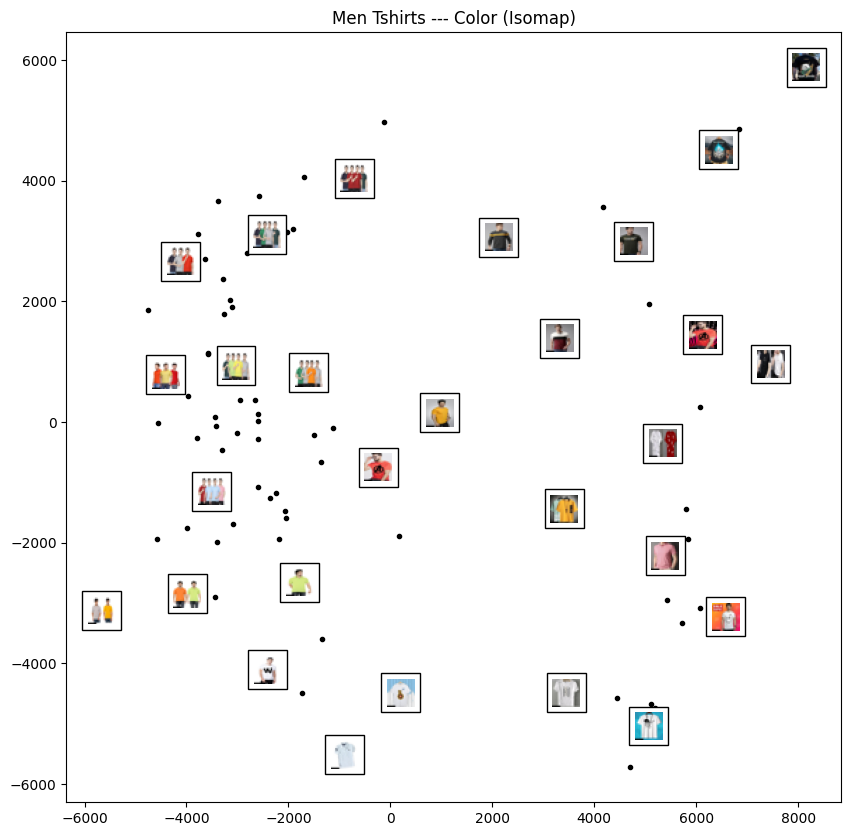

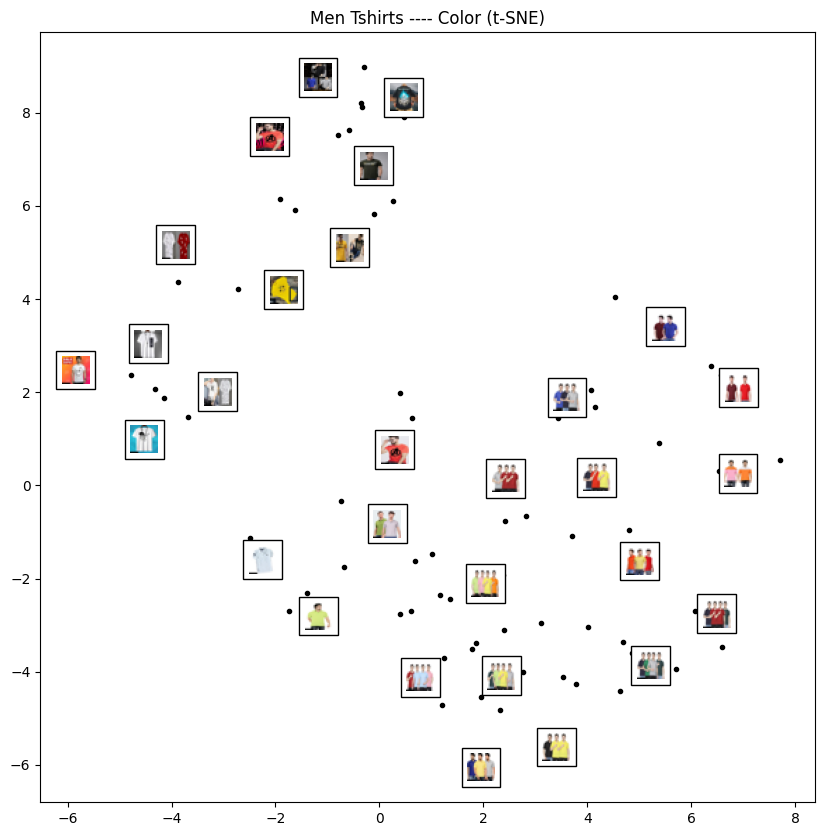

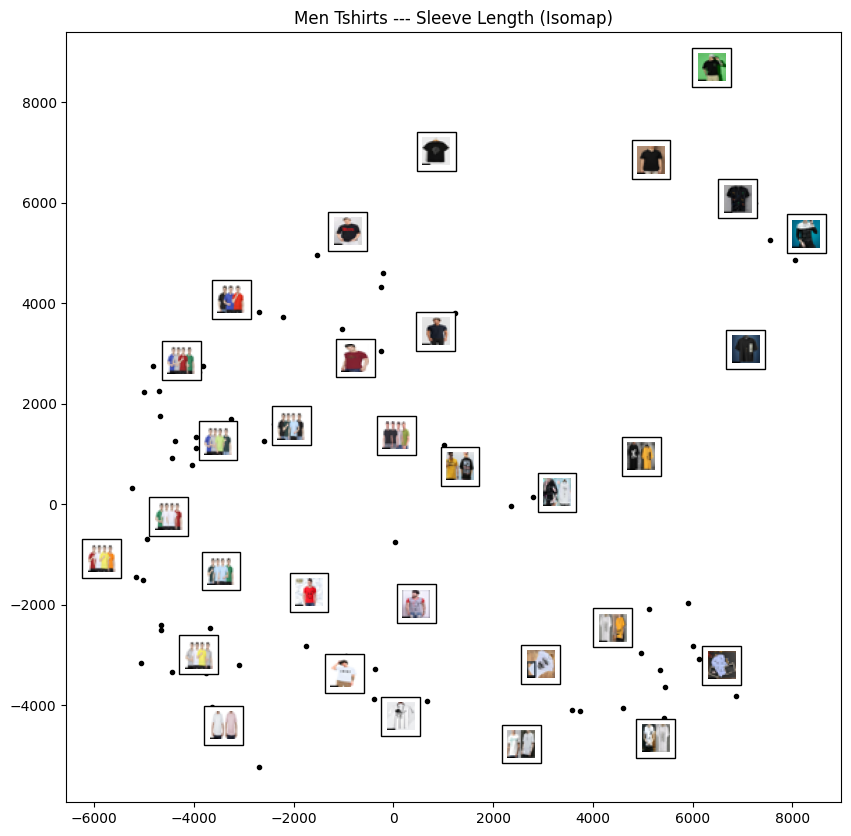

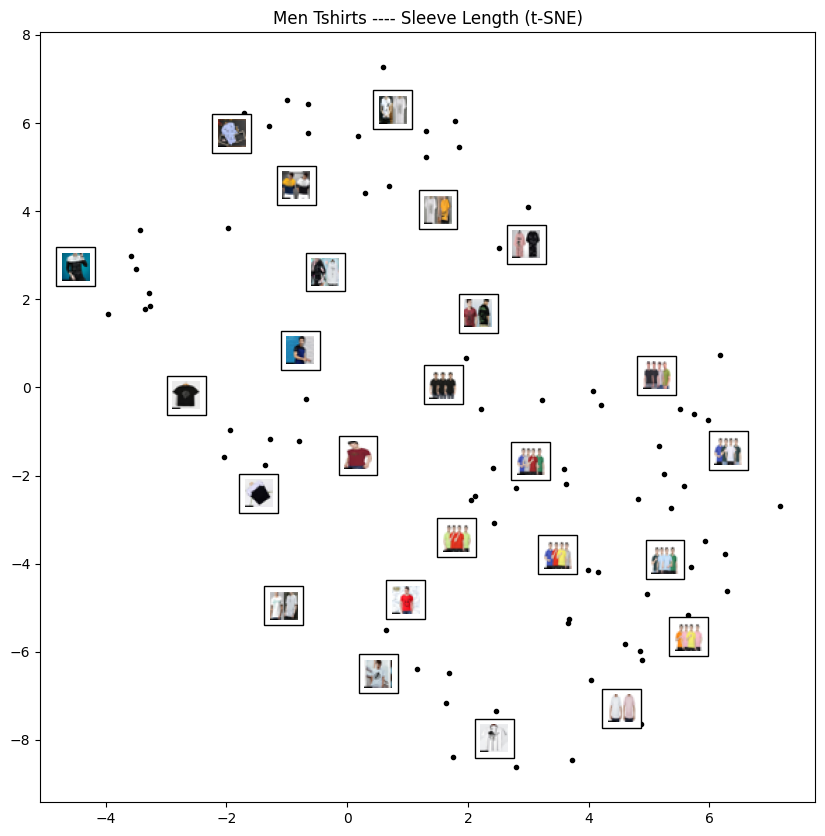

/speech/utkarsh/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/speech/utkarsh/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


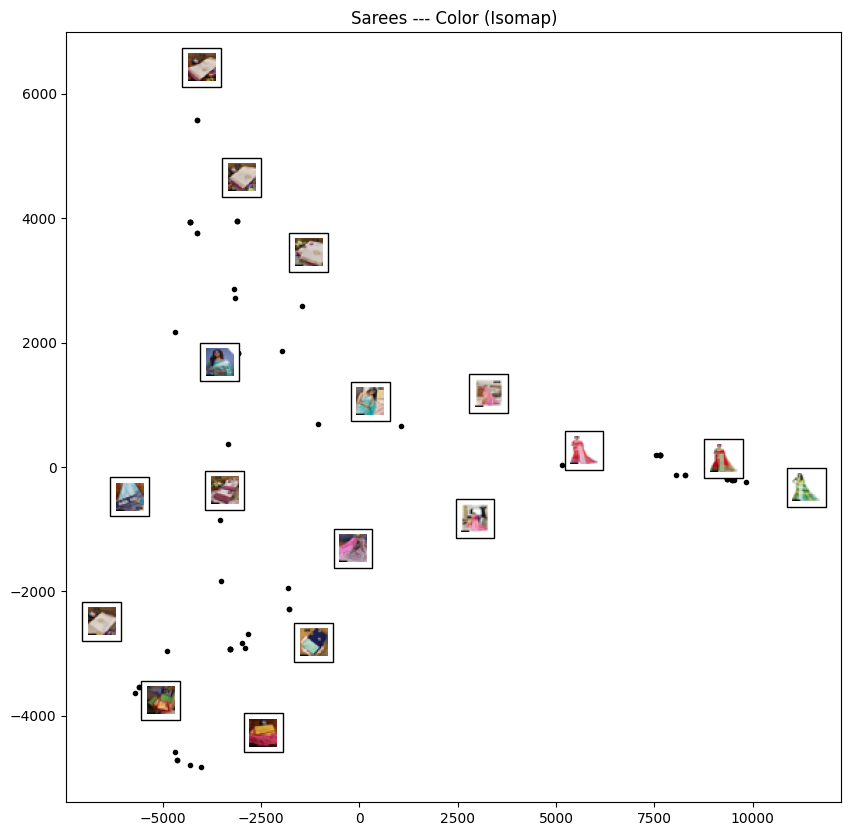

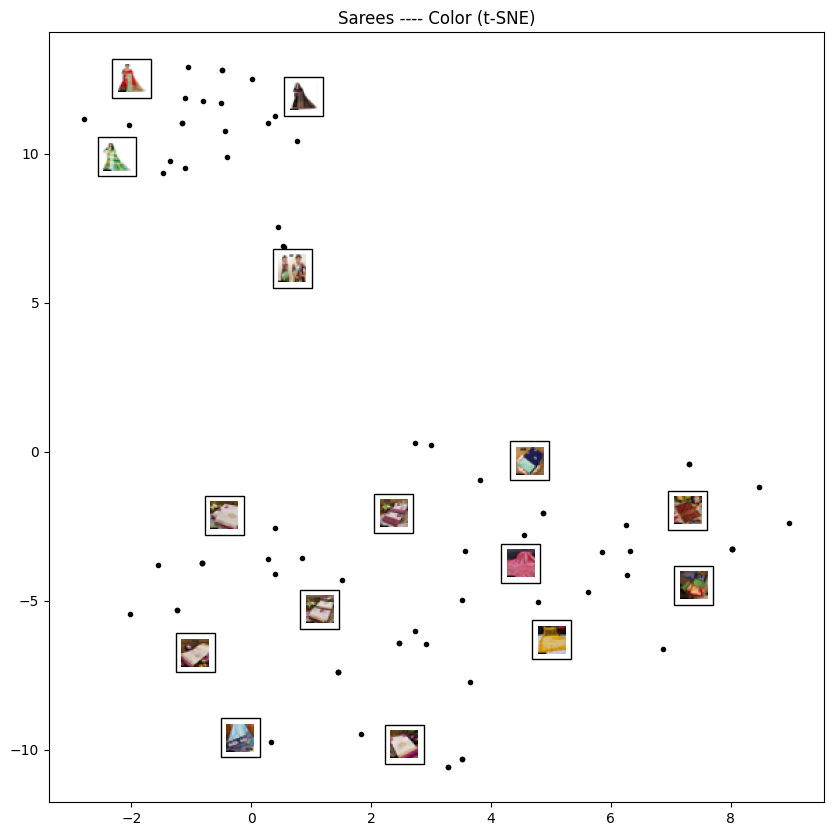

/speech/utkarsh/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/speech/utkarsh/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/speech/utkarsh/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/speech/utkarsh/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, c

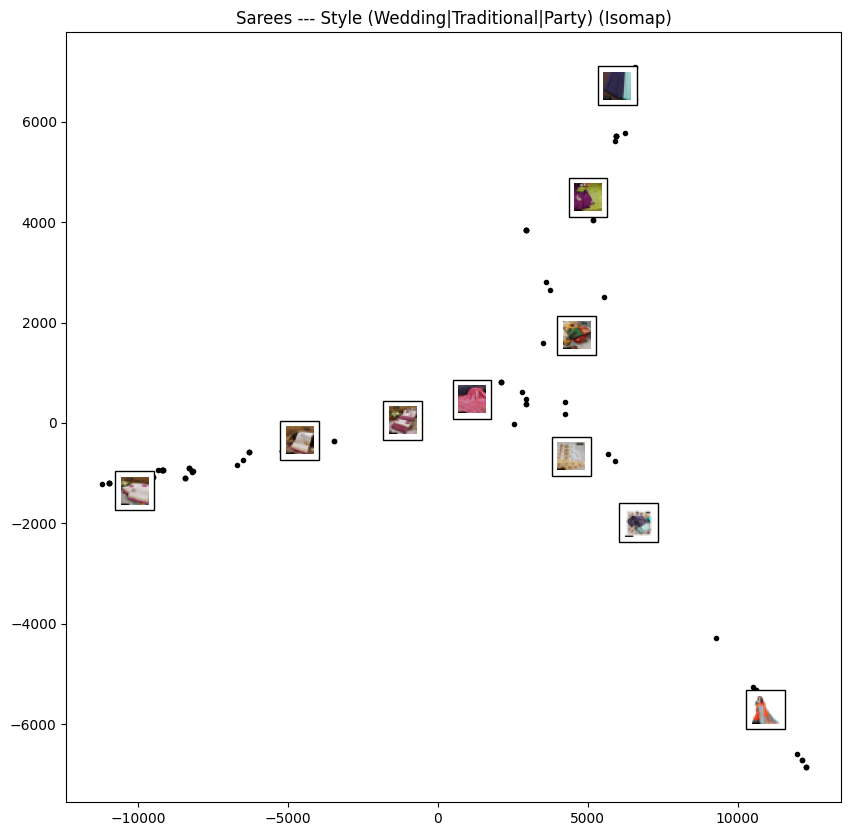

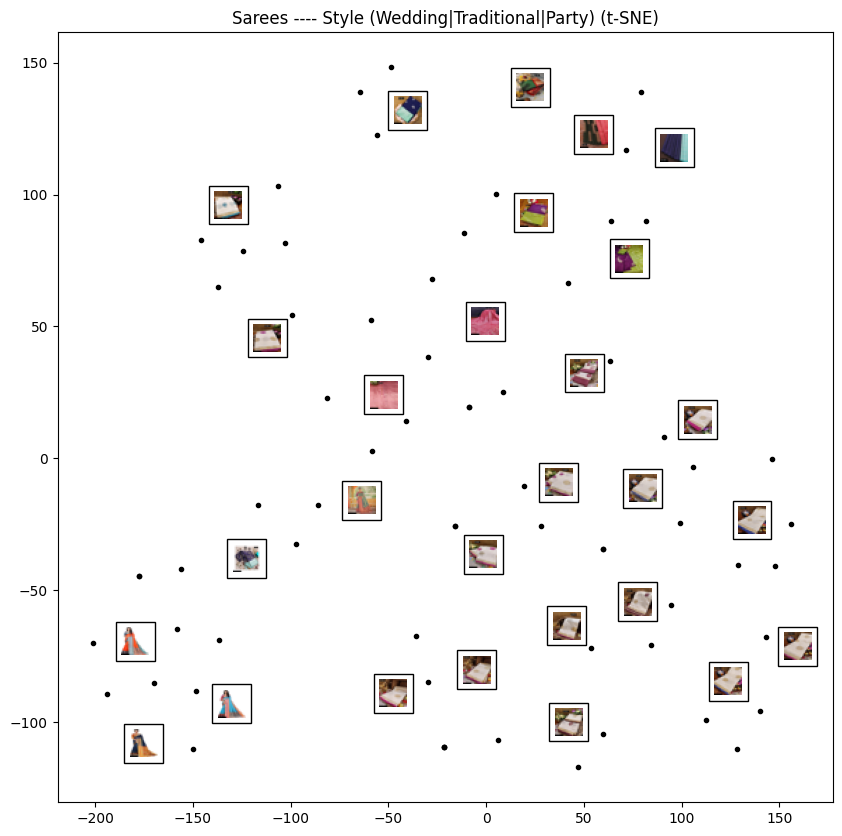

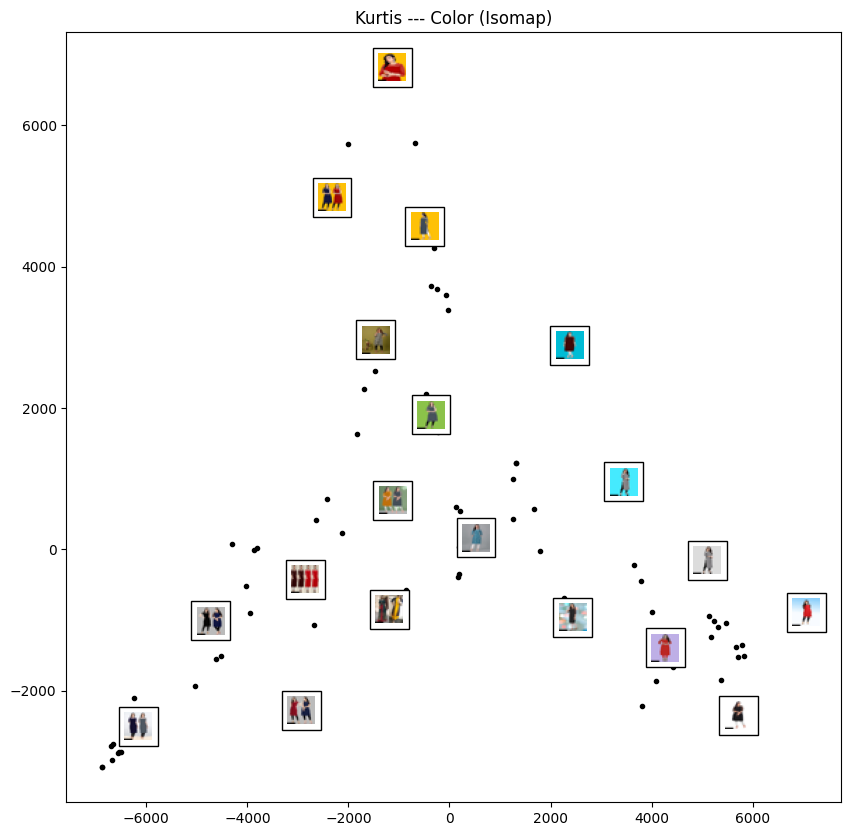

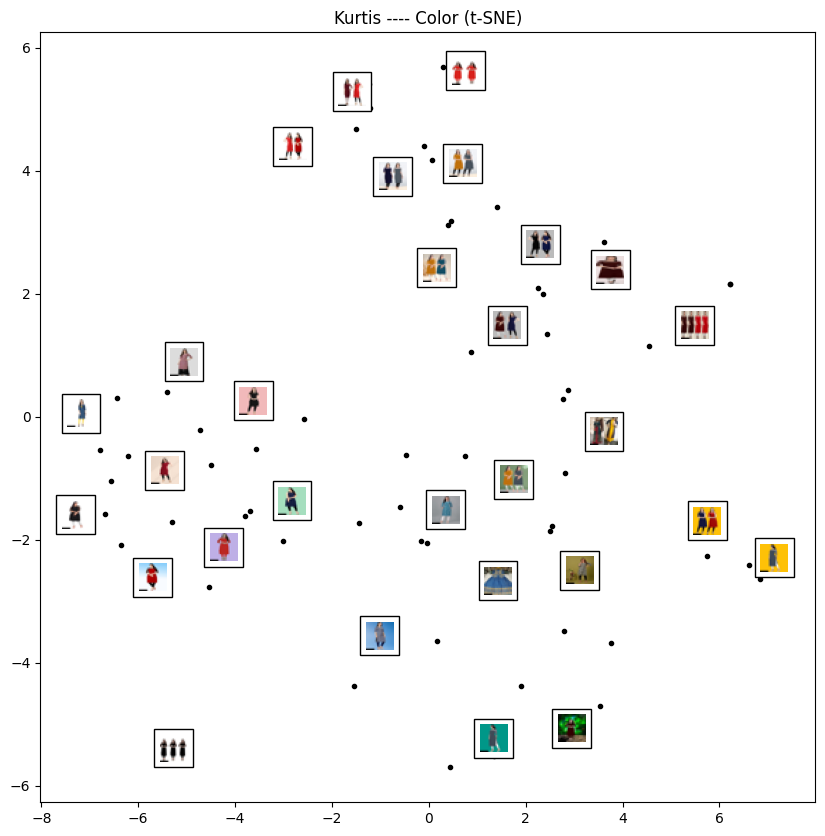

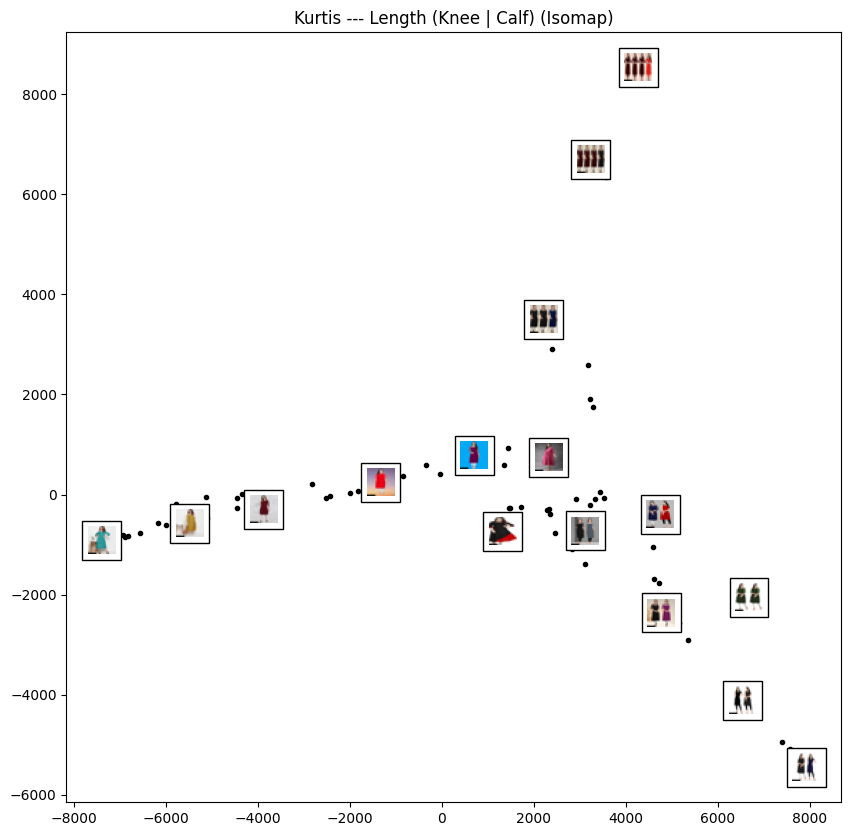

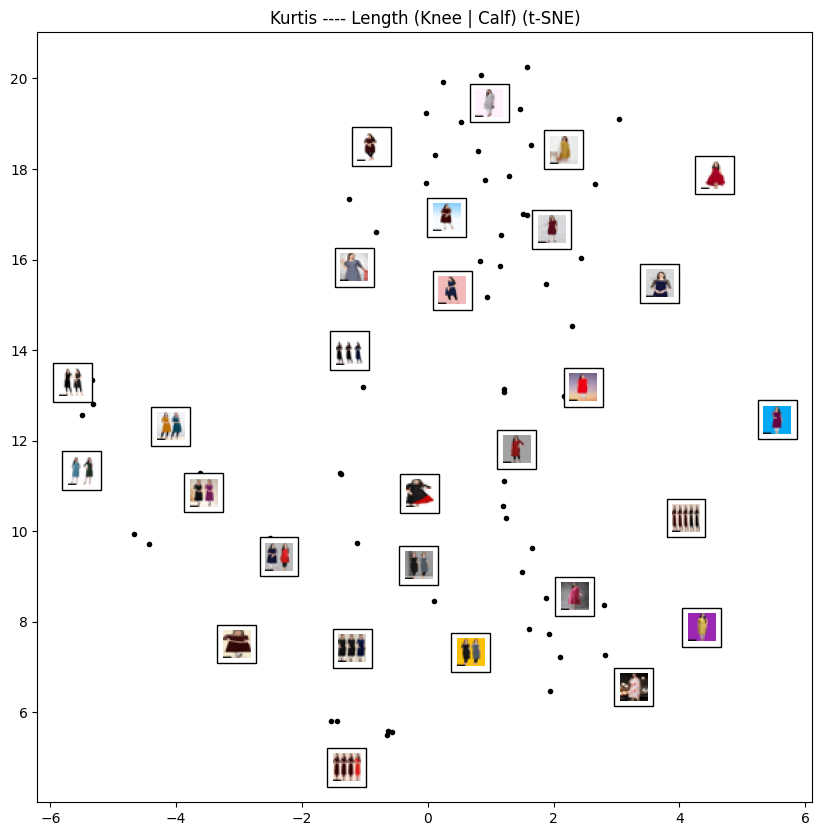

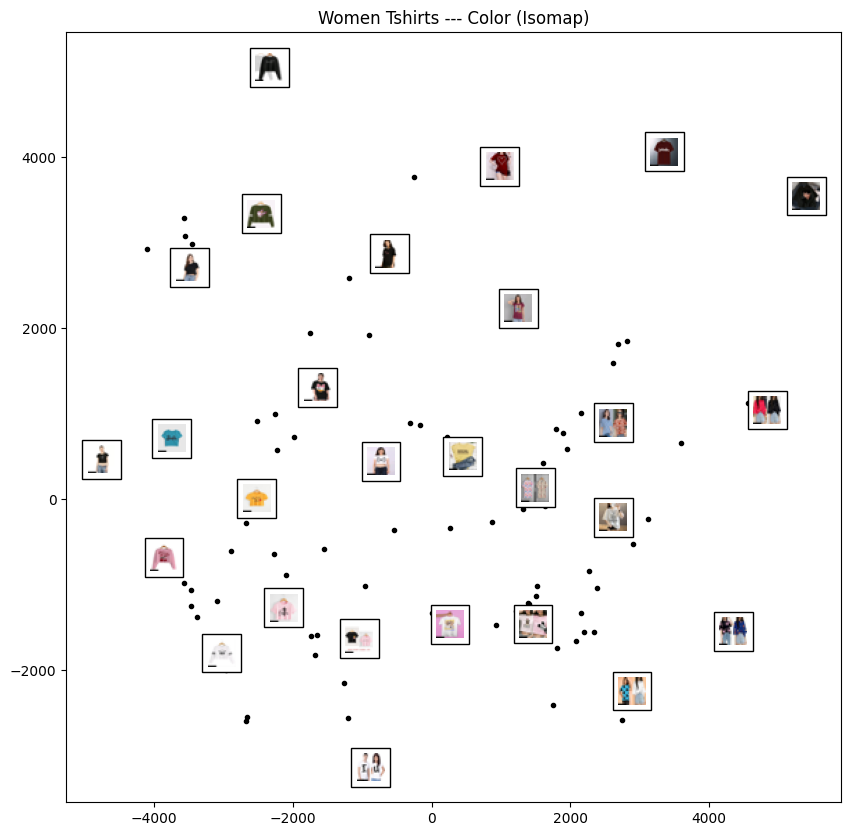

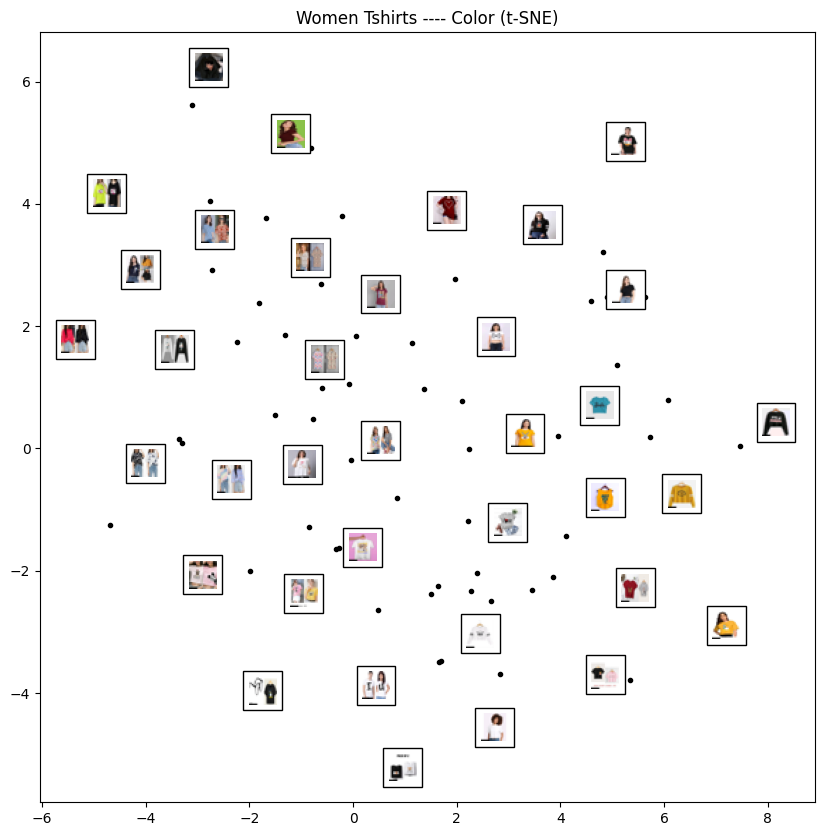

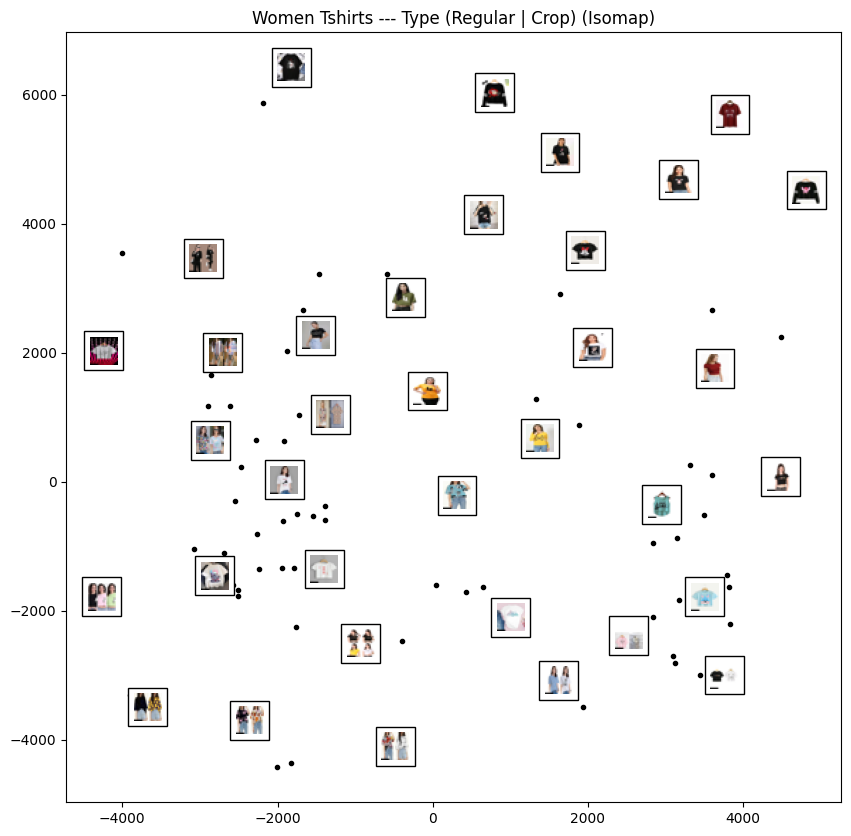

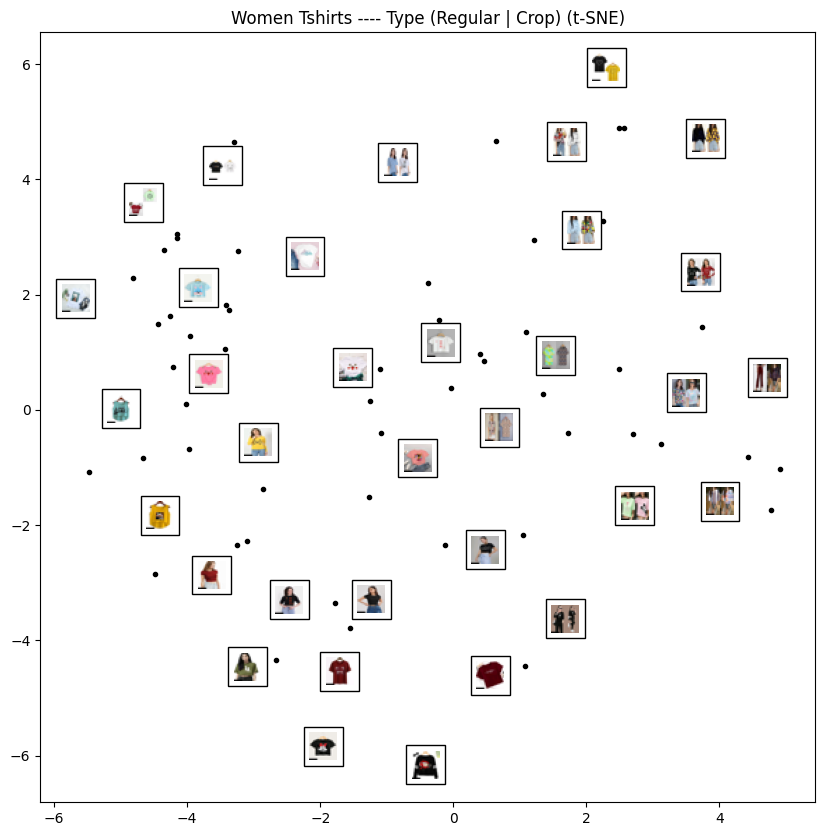

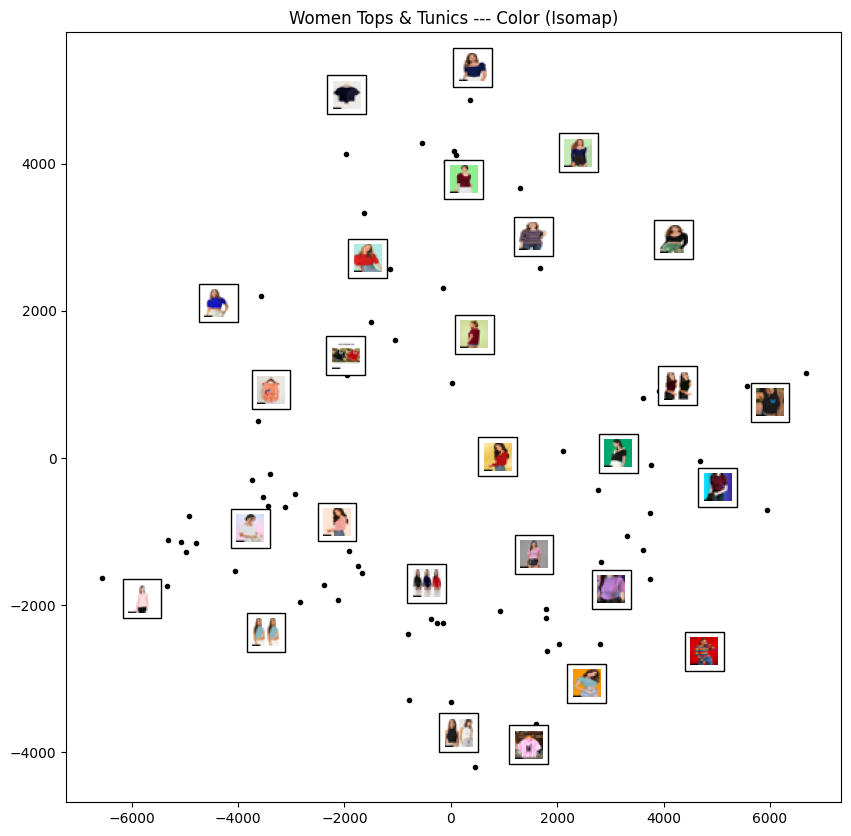

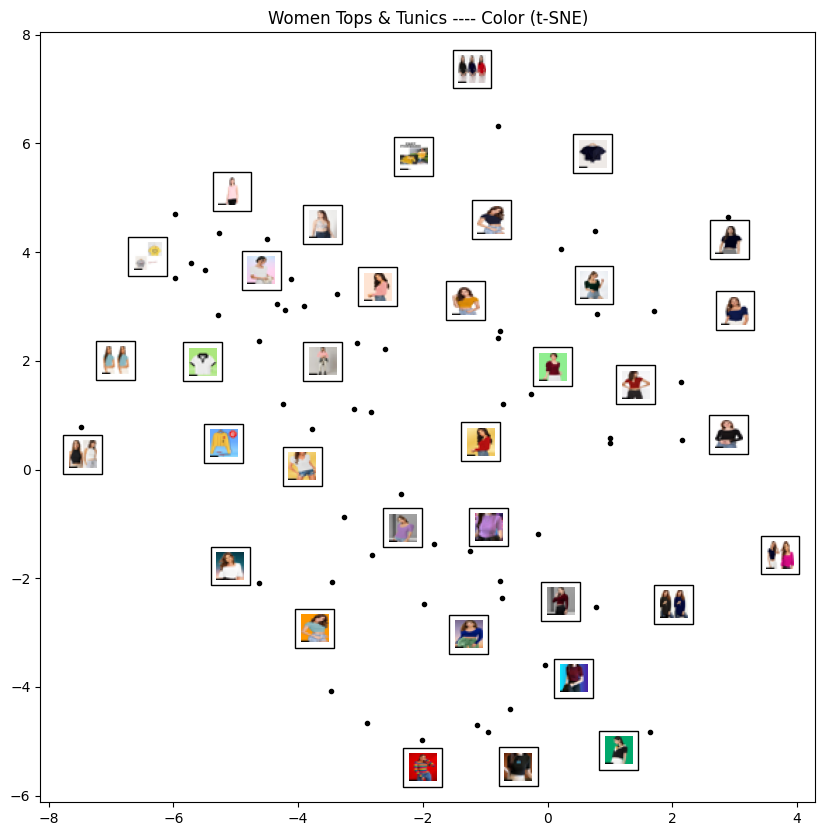

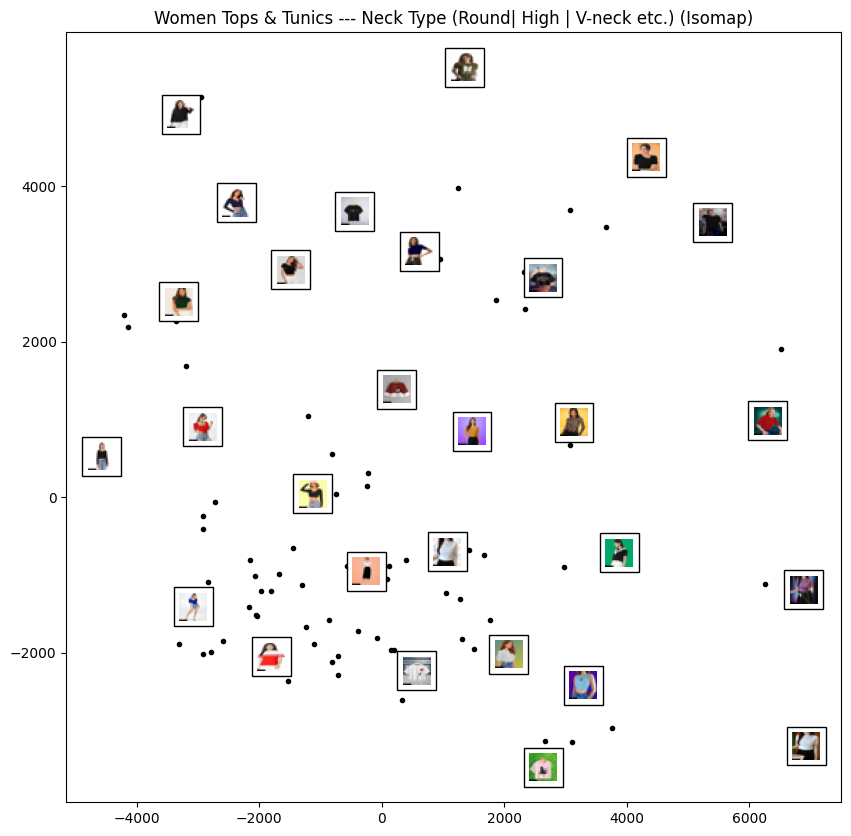

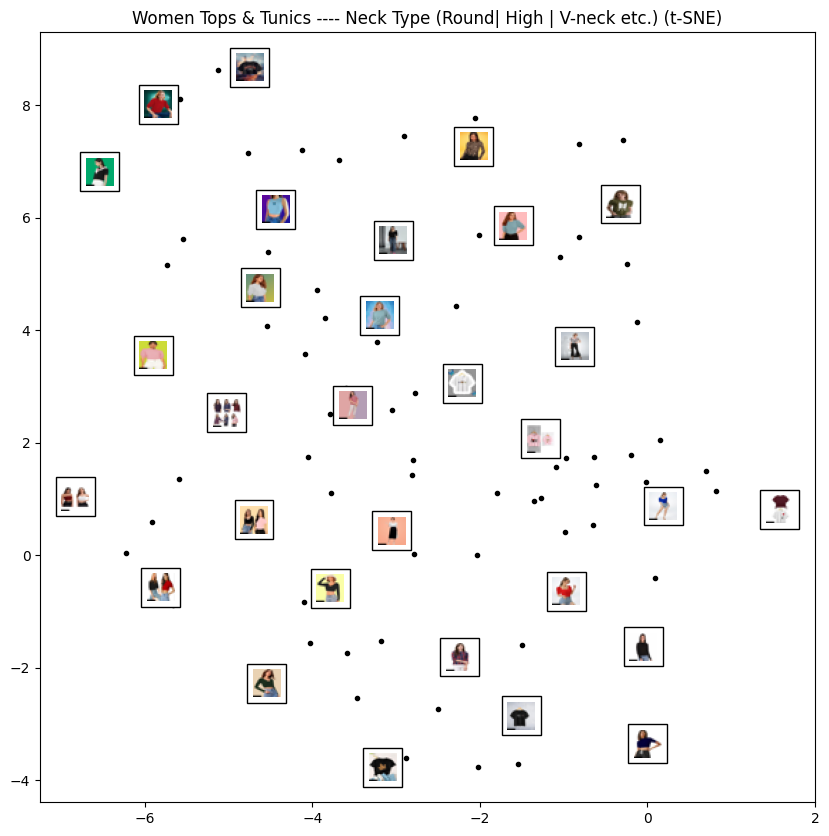

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.manifold import Isomap, TSNE

###TASK 1
df = pd.read_csv('/speech/utkarsh/ass9/train.csv')

image_folder = '/speech/utkarsh/ass9/train_images/'

# Dictionary to store baskets and their samples
baskets = {}

# For each category, pick two attributes and draw samples
for category in df['Category'].unique():
    # Subset the DataFrame for this category
    category_df = df[df['Category'] == category]

    # Get available attribute columns
    num_attributes = int(category_df['len'].iloc[0])
    attribute_columns = [f'attr_{i+1}' for i in range(num_attributes)]

    # Define selected attributes based on the category
    if category == "Men Tshirts":
        # Choosing Color and Sleeve length
        selected_attributes = [attribute_columns[0], attribute_columns[4]]
    elif category == "Sarees":
        #Choosing Color and Style
        selected_attributes = [attribute_columns[3], attribute_columns[4]]
    elif category == "Kurtis":
        # Choosing Color and length
        selected_attributes = [attribute_columns[0], attribute_columns[2]]
    elif category == "Women Tshirts":
        # Choosing Color and Type
        selected_attributes = [attribute_columns[0], attribute_columns[2]]
    elif category == "Women Tops & Tunics":
        #Choosong Color and Neck Type
        selected_attributes = [attribute_columns[0], attribute_columns[3]]

    # Create baskets for each attribute
    for attr in selected_attributes:
        basket_key = (category, attr)

        # Drop rows with NaN
        filtered_df = category_df.dropna(subset=[attr])

        #To Check if we have at least 100 samples
        if len(filtered_df) >= 100:
            samples = filtered_df[attr].sample(100, replace=False).tolist()
            sample_ids = filtered_df[attr].sample(100, replace=False).index
        else:
            # Sample with replacement if less than 100 rows are available
            samples = filtered_df[attr].sample(min(100, len(filtered_df)), replace=True).tolist()
            sample_ids = filtered_df[attr].sample(min(100, len(filtered_df)), replace=True).index

        # Store samples in the basket dictionary
        baskets[basket_key] = sample_ids
####TASK2
# Function to plot components with a dimensionality reduction model
def plot_components(data, model, images=None, ax=None, thumb_frac=0.1, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                proj[i]
            )
            ax.add_artist(imagebox)

# Loop through each basket and visualize with both Isomap and t-SNE
for (category, attr), sample_ids in baskets.items():
    images = []
    for idx in sample_ids:
        img_id = str(df.loc[idx, 'id']).zfill(6)  # Zero-pad the ID to 6 digits
        img_path = os.path.join(image_folder, f"{img_id}.jpg")
        if os.path.exists(img_path):
            # img = Image.open(img_path).convert('L').resize((20, 20))  # Convert to grayscale and resize
            img = Image.open(img_path).resize((20, 20))
            images.append(np.array(img))
        else:
            print(f"Image not found for ID: {img_id}")

    # Skip visualization if no images were loaded
    if not images:
        print(f"No images loaded for basket: {(category, attr)}")
        continue

    # Convert images to a numpy array suitable for dimensionality reduction
    X = np.array([img.flatten() for img in images])

    #SIncethe attributes were different for each category: Renaming the attribute name for better understanding of the visualisations
    if category == "Men Tshirts" and attr== "attr_1":
        attr = "Color"
    if category == "Men Tshirts" and attr== "attr_5":
        attr = "Sleeve Length"

    if category == "Sarees" and attr== "attr_4":
        attr = "Color"
    if category == "Sarees" and attr== "attr_5":
        attr = "Style (Wedding|Traditional|Party)"

    if category == "Kurtis" and attr== "attr_1":
        attr = "Color"
    if category == "Kurtis" and attr== "attr_3":
        attr = "Length (Knee | Calf)"

    if category == "Women Tshirts" and attr== "attr_1":
        attr = "Color"
    if category == "Women Tshirts" and attr== "attr_3":
        attr = "Type (Regular | Crop)"

    if category == "Women Tops & Tunics" and attr== "attr_1":
        attr = "Color"
    if category == "Women Tops & Tunics" and attr== "attr_4":
        attr = "Neck Type (Round| High | V-neck etc.)"

    # Plot using Isomap
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_components(X, model=Isomap(n_components=2), images=images, ax=ax)
    ax.set_title(f"{category} --- {attr} (Isomap)")
    plt.show()

    # Plot using t-SNE
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_components(X, model=TSNE(n_components=2, random_state=42), images=images, ax=ax)
    ax.set_title(f"{category} ---- {attr} (t-SNE)")
    plt.show()


# Task 3 : Interpretations of Visualizations for All Baskets

The following provides interpretations for each basket created across the five categories. Each basket contains images sampled based on a particular attribute, visualized using Isomap and t-SNE to examine clustering and attribute-specific groupings.

---

### 1. **Men Tshirts - Color**

#### Interpretation:
- **Isomap Visualization**: Clusters likely form around predominant colors like red, blue, black, or white. A dense grouping indicates that similar colors are prevalent, making it easier to visually distinguish between different color groups. Isomap’s global structure preservation allows us to see overall color trends across images.
- **t-SNE Visualization**: Local groupings reveal subtle shades and variations within primary colors, such as light vs. dark blue, which t-SNE can effectively separate. A noticeable spread in clusters might indicate a range of shades within common colors.
1. **Color Saturation** : The left side of the plot has more muted and lighter colors, such as whites, grays, and light blues, whereas the right side contains more vivid and saturated colors like reds, greens, and darker tones. This suggests that one axis of the manifold may represent the saturation or vividness of the color in the T-shirts, with lower saturation on one end and higher saturation on the other.
2.**Color Hue**: The plot's vertical distribution appears to separate colors based on hue. For instance, warmer colors like reds and oranges seem to cluster in the top-middle, while cooler colors like blues and greens are spread towards the bottom and right. This pattern implies that the second component of the manifold might represent the color hue, capturing the general "temperature" or tone of the color.
---

### 2. **Men Tshirts - Sleeve Length**

#### Interpretation:
- **Isomap Visualization**: Clusters here represent distinct sleeve lengths, such as short, half, and long sleeves. Close proximity of images with similar sleeve lengths indicates strong attribute coherence. Isomap's structure preservation may show how sleeve lengths relate across the dataset.
- **t-SNE Visualization**: Fine-grained local clustering reveal small variations in sleeve lengths and styles, such as short vs. regular long sleeves. If overlapping, it may indicate some ambiguity or similarity in styling within this attribute.
1. **Color Saturation** : The bottom side of the plot has more muted and lighter colors, such as whites, grays, and light blues, whereas the upper side contains more vivid and saturated colors like reds, greens, and darker tones. This suggests that one axis of the manifold may represent the saturation or vividness of the color in the T-shirts, with lower saturation on one end and higher saturation on the other.
2.**Color Hue**: The plot's vertical distribution appears to separate colors based on hue. Also, grouping of tshirts based sleeves can be seen on bottom right side.  For instance, warmer colors like reds and oranges seem to cluster in the top-middle, while cooler colors like blues and greens are spread towards the bottom and right. This pattern implies that the second component of the manifold might represent the color hue, capturing the general "temperature" or tone of the color.
---

### 3. **Sarees - Color**

#### Interpretation:
- **Isomap Visualization**: Large clusters for colors such as red, green, and blue could emerge, reflecting traditional color choices for sarees. The global structure shows color choices that might be culturally or fashion-driven.
- **t-SNE Visualization**: Within each main color group, smaller clusters may form, showing subtle differences in color shades and fabric texture. For instance, variations in fabric tone may influence clustering within colors like red or green.
1. **Color Saturation** : The upper side of the plot has more lighter colors, such as whites, grays, and light blues, whereas the lower side contains more vivid and saturated colors like reds, greens, and darker tones. This suggests that one axis of the manifold may represent the saturation or vividness of the color in the T-shirts, with lower saturation on one end and higher saturation on the other.
2. **Style** : Images with model are grouped togetherat the top and are also vibrant and pastel in natur. While below cluster has simple colors while there is only image of the sarees and no models.
---

### 4. **Sarees - Style (Wedding, Traditional, Party)**

#### Interpretation:
- **Isomap Visualization**: Strong clusters represent saree styles based on usage (e.g., wedding vs. party). Traditional sarees might be grouped separately due to their unique patterns and embellishments, giving insight into style distinctions.
- **t-SNE Visualization**: Styles may be broken down into finer details, showing subtle groupings within styles like wedding sarees that are highly ornate or those with simpler designs. Overlapping clusters suggest that some styles share visual similarities, such as party and traditional sarees, if fabric patterns are similar.
1. **color** : The vertical distribution seems to capture differences in color intensity and detailing. Sarees with bold, contrasting colors and high visual appeal (often used for festive or party wear) cluster towards one end of the vertical axis. In contrast, sarees with softer or more muted colors spread out along the other end. Bright, richly colored sarees are clustered in the upper sections, indicating that this axis might capture saree color and detailing. Lighter or pastel-colored sarees, often worn in more traditional settings, are found in the lower section of the plot.
2. **Occasion/Formality Level** : The horizontal spread across the plot likely represents a spectrum of formality or occasion type. On one side, we see sarees that appear simpler and less ornate, which could represent traditional or everyday wear. Moving across the plot, we encounter sarees with more vibrant colors, embellishments, or intricate patterns, suggesting styles suited for parties or weddings.Wedding sarees, which are often elaborate with heavy embroidery, appear clustered on one side, while more traditional sarees with simpler designs are found on the other. This separation aligns with formality levels and how sarees are worn on different occasions.
---

### 5. **Kurtis - Color**

#### Interpretation:
- **Isomap Visualization**: Clusters expected for main colors such as blue, white, and yellow, reflecting common color schemes for Kurtis. The global view show these groups clearly separated.
- **t-SNE Visualization**: Smaller clusters within main colors may represent different patterns or tones, such as floral blue vs. plain blue Kurtis. This fine-grained separation highlights subtle visual differences that Isomap may not capture as distinctly.
1. **Color**: The kurtis with similar color are grouped together. Also the horizontal line suggest the images going from darker to a lighter tones.
2.**Color Hue**: The plot's vertical distribution appears to separate colors based on hue. For instance, warmer colors like reds and oranges seem to cluster in the top-middle, while cooler colors like blues and greens are spread towards the bottom and right. This pattern implies that the second component of the manifold might represent the color hue.
---

### 6. **Kurtis - Length (Knee, Calf)**

#### Interpretation:
- **Isomap Visualization**: Length-based clusters emerge, separating knee-length from calf-length Kurtis. This distinction likely reflects a structural difference in visual representation, with knee-length Kurtis occupying a distinct area from calf-length ones.
- **t-SNE Visualization**: Detailed clustering may reveal variations within each length, like whether the Kurtis have patterns, or layering, which may affect the visual spread. Overlapping clusters suggest that some designs are ambiguous in length, such as mid-length styles.

1. **Length (Knee-Length vs. Calf-Length)**: The primary factor that appears to influence the layout is the length of the kurtis, as indicated by the label. The horizontal axis is representing this feature. Knee-length kurtis are clustered toward one end, while calf-length kurtis spread toward the other end. This distinction reflects functional and stylistic preferences for different occasions, as shorter kurtis may be preferred for casual wear, while longer ones are often chosen for semi-formal or traditional settings.

2. **Color & Embellishment Intensity**: The vertical axis likely captures variations in color vibrancy and embellishments. Kurtis with brighter, richer colors (such as red or blue) and those with added decorative details (such as patterns or embroidery) are grouped in specific regions of the plot. In contrast, simpler, more neutral-colored kurtis, or those with minimal embellishments, appear in different areas. This component helps differentiate kurtis based on visual appeal and intended formality, as brighter and embellished kurtis might be favored for special occasions or festive wear.


---

### 7. **Women Tshirts - Color**

#### Interpretation:
- **Isomap Visualization**: Similar to other color-based baskets, main clusters form around common colors like black, white, or pastel shades, which are similar in women's Tshirts.
- **t-SNE Visualization**: t-SNE reveal intra-color clusters, such as patterned white Tshirts versus solid white ones. Variations in shades, such as pastel pink versus bright pink, might result in fine distinctions within each color cluster.
1. **Color Intensity/Brightness** : The horizontal axis seems to represent a range in color intensity or brightness. T-shirts on the left side of the plot appear darker, indicating a grouping of T-shirts with deeper or more muted tones. Moving toward the right, we observe T-shirts with lighter colors, brighter shades, and potentially higher saturation, suggesting a gradient from dark to vibrant color tones. Dark-colored T-shirts, such as black and navy, are clustered on the left side, while lighter-colored T-shirts, including bright yellows, whites, and pastels, are positioned on the right. This organization aligns with a color intensity or brightness dimension, where T-shirts are separated based on the darkness or lightness of their color.

2.  **Style Complexity** : The vertical axis appears to represent the level of style complexity or pattern detail. At the top of the plot, T-shirts tend to have solid colors or simpler designs. As we move down the plot, we encounter T-shirts with more intricate details, such as graphics, logos, and multi-color patterns, indicating a gradient from minimalistic to more complex styles.
Plain or solid-colored T-shirts are found at the upper sections, while T-shirts with graphics, prints, or multiple colors are located lower on the plot. This separation suggests that the vertical axis captures the complexity of design, distinguishing between simple and visually complex T-shirts.

---

### 8. **Women Tshirts - Type (Regular, Crop)**

#### Interpretation:
- **Isomap Visualization**: A distinct separation is there between regular and crop Tshirts, reflecting major differences in garment structure. Regular Tshirts might form a cohesive cluster, distinct from crop styles.
- **t-SNE Visualization**: Within each main type, t-SNE might further separate sub-styles, like loose vs. fitted crop Tshirts. There is overlap, it may be because some regular Tshirts are shorter and visually similar to crop styles, showing ambiguity in length perception.
1. **T-Shirt Length (Regular vs. Crop)** :: The horizontal axis likely captures a distinction in T-shirt length, with one side representing regular-length T-shirts and the other representing cropped styles. Moving across the plot horizontally, we observe that T-shirts appear to transition from regular-length styles to cropped or shorter cuts. On one side of the plot, T-shirts with a regular fit appear more frequently, while on the other, there are more cropped or shorter T-shirts. This horizontal distribution aligns with the length of the T-shirts, indicating that this axis differentiates regular from cropped styles.

2. **Color and Pattern Complexity** :The vertical axis seems to represent a gradient of color complexity and pattern. T-shirts higher on the plot tend to be solid-colored or have minimal patterns, while those lower on the plot show more variation in colors, patterns, or graphic details. Solid-colored or simpler designs are clustered towards the top, while T-shirts with graphics, text, or multiple colors are located towards the bottom. This vertical separation implies that the axis represents color and pattern complexity, distinguishing between plain and more visually intricate T-shirts.
---

### 9. **Women Tops & Tunics - Color**

#### Interpretation:
- **Isomap Visualization**: Clusters appear for main colors such as white, blue, and pink. The global structure highlights general color preferences for women’s tops.
- **t-SNE Visualization**: Smaller groupings represent shades within these colors or patterns that differentiate plain colors from textured or floral designs. A spread within each color cluster indicate a variety of styles in the same color.
1. **Color Intensity** : The horizontal axis likely represents a spectrum of color intensity, moving from lighter to darker tones. On one side of the plot, we see tops in lighter colors like pastels and whites, while on the other side, darker-colored tops (like navy, black, and deep shades) are more prevalent.
Lighter-colored tops, including whites and pastels, cluster on one end, whereas darker-colored tops, such as blacks and dark greens, appear on the opposite end. This distribution aligns with a color intensity gradient, from light to dark, along the horizontal axis.

2. **Color Saturation and Vibrancy** :The vertical axis appears to capture the level of color saturation and vibrancy. Higher up on the plot, we observe tops with bold, vibrant colors, while lower down, there are more muted or subdued tones, including pastels or softer colors.Tops with vibrant, saturated colors like reds, greens, and bright yellows are located at the upper sections, while those with softer, less intense colors, such as pale pinks and neutrals, are found towards the bottom. This arrangement suggests that the vertical axis captures the saturation or vibrancy of colors, distinguishing between bright and muted tones.
---

### 10. **Women Tops & Tunics - Neck Type (Round, High, V-neck)**

#### Interpretation:
- **Isomap Visualization**: This visualization reveal distinct clusters for different neck types, as the structure of the neck has a significant impact on visual appearance. Round neck and V-neck tops might cluster separately.
- **t-SNE Visualization**: Within each neck type, detailed clusters show sub-varieties, like scoop neck vs. crew neck under "Round" or high vs. low V-neck. An overlap in clusters could imply that neck types have similar cuts, especially in less distinct designs.

1. **Style Diversity (representing variety in color, uniqueness, and complexity of styles)** : The images along the horizontal spread vary in color, neck types, and clothing styles, with minimal clustering on specific features. The left side seems to feature a mix of darker, simpler styles, while the right has more colorful, unique patterns. This component represent a Style Diversity dimension, capturing differences in style complexity, colorfulness, and distinctiveness.
2. **Neck Coverage (indicating openness vs. coverage in neckline styles)**:  The vertical spread displays differences in cut and necklines, especially the height and openness of the neckline (e.g., high neck, V-neck). The higher Y-axis values represent Neck Coverage, while lower values indicate a more open or relaxed neckline style.
---



##Reference


1.   DAL Repo on Github
2.   TSNE
3.   Matplotlib
4.   GeeksforGeeks
5.   Scikitlearn

